# Abdullah Alseddiq

# Netflix data analysis and shows recommendation - Metis Project

Goal of the study: Analyze netflix dataset, and develop recommendation model based on age category for shows

 Importing python libraries for data processing

In [536]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler

Reading the data set

In [537]:
netflixDf = pd.read_csv('netflix_titles.csv')

Explantory Data Analysis

In [538]:
netflixDf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [539]:
netflixDf.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [540]:
#A general idea about the release year
netflixDf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [541]:
#Check the types of columns
netflixDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [542]:
#Dataset size
netflixDf.shape

(8807, 12)

Analysing how many movies and shows are in the dataset

<AxesSubplot:xlabel='type', ylabel='count'>

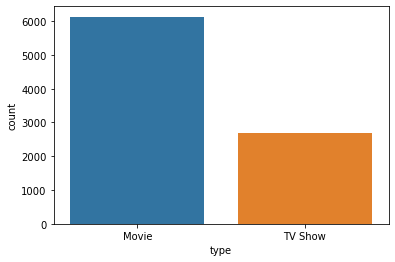

In [543]:
sns.countplot(x='type',data=netflixDf)

In [544]:
netflixDf.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

The propotion of movies compare to TV shows

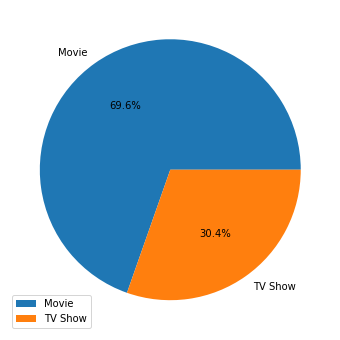

In [545]:
plt.figure(figsize= (6,6))
percent = netflixDf['type'].value_counts()
val = percent.index
plt.pie(percent.values, labels = val,autopct="%1.1f%%")
plt.legend()
plt.show()

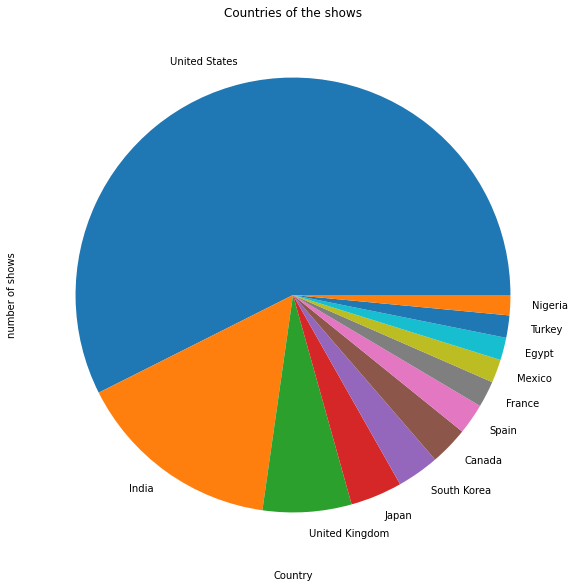

In [546]:
plt.figure(figsize=(15,10))
new_Df['country'].value_counts().nlargest(12).plot(kind='pie')
plt.xticks(rotation=90)
plt.title('Countries of the shows')
plt.xlabel('Country')
plt.ylabel('number of shows');

We conclude that Netflix is focused on listing Movies more than TV shows, and specially the ones produced in the United states.

Dataset clean up before modeling

Check what columns contain null values, Check rows that contain null values

In [547]:
netflixDf.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


Check duplicate rows if any exist?

In [548]:
netflixDf[netflixDf.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [549]:
netflixDf.duplicated().sum()

0

Result: no duplicate exist

Number of null values existing in each column

In [550]:
netflixDf.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

From the result above, we have several columns with null values. Some will be relevant to the study some will not.

Since we have very few rows (10) with n/a for the date added and duration (3), we delete those rows

In [551]:
#Create a new netflix dataframe that will hold an optimized version of the netflix dataframe
new_Df = netflixDf[netflixDf["date_added"].notna()]

In [552]:
new_Df = new_Df[new_Df["duration"].notna()]

In [553]:
#Check if the 10 rows removed correclty
new_Df.isnull().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [554]:
#Silence erros to be able to copy dataframes
pd.options.mode.chained_assignment = None 

Some columns will not be important for the study such as:
 "director", "cast", "Description"
No matter what they be, they will have no effect on the study
Therefore, these columns will be dropped

In [555]:
#Drop irrelevant columns
new_Df.drop(['director'], inplace = True, axis = 1)
new_Df.drop(['cast'], inplace = True, axis = 1)
new_Df.drop(['description'], inplace = True, axis = 1)

In [556]:
new_Df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


For null values for the rating, and country column, i will replace nulls with the most occuring values

In [557]:
countryReplacor = new_Df["country"].mode()[0]
countryReplacor


'United States'

In [558]:
ratingReplacor = new_Df["rating"].mode()[0]
ratingReplacor

'TV-MA'

In [559]:
#Fill null values for country columns
new_Df["country"] = new_Df["country"].fillna(countryReplacor)
new_Df["rating"] = new_Df["rating"].fillna(ratingReplacor)

In [560]:
#Check nulls account after the clean up in the new data frame created and cleaned
#result should contain zero nulls for each column
new_Df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# Design for recommendation model

To build the train dataset, we don't want many columns, so i'll take title, release year. and join it with the dumies for the model

In [561]:
#Take out columns of intrest from the cleaned dataset
shows_info = new_Df[["title", "release_year"]]
shows_info

,title,release_year
0,Dick Johnson Is Dead,2020
1,Blood & Water,2021
2,Ganglands,2021
3,Jailbirds New Orleans,2021
4,Kota Factory,2021
...,...,...
8802,Zodiac,2007
8803,Zombie Dumb,2018
8804,Zombieland,2009
8805,Zoom,2006


I'll build a model that suggest similar shows based on age category

# Model based on age category

There are a lot of categories for each TV show or movie representing the appropiate age that can watch them

In [562]:
new_Df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

We can reduce those rating categories to 4 different values to make the study easy, and be able to understand categories quickly

In [563]:
age_cat = {'NC-17': 'Adults','TV-Y7-FV': 'Older Kids','UR': 'Adults','TV-MA': 'Adults','R': 'Adults','PG-13': 'Teens','TV-14': 'Teens','TV-PG': 'Older Kids','NR': 'Adults','TV-G': 'Kids','TV-Y': 'Kids','nan' : 'null','TV-Y7': 'Older Kids','PG': 'Older Kids','G': 'Kids',
}
new_Df["age_cat"] = new_Df["rating"].replace(age_cat)
new_Df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,age_cat
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,Teens
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Adults
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Adults
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",Adults
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Adults
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers",Adults
8803,s8804,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",Older Kids
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Adults
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",Older Kids


In [564]:
new_Df["age_cat"].value_counts()

Adults        4093
Teens         2647
Older Kids    1487
Kids           567
Name: age_cat, dtype: int64

In [565]:
#Getting dummies to transform categorical data, to be understood by the model
show_age_categories = pd.get_dummies(new_Df["age_cat"])
show_age_categories.head()

,Adults,Kids,Older Kids,Teens
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [566]:
ageCat_train_data = pd.concat([shows_info, show_age_categories], axis = 1)
ageCat_train_data.set_index("title", inplace = True)
ageCat_train_data.head(10)

,release_year,Adults,Kids,Older Kids,Teens
title,,,,,
Dick Johnson Is Dead,2020,0,0,0,1
Blood & Water,2021,1,0,0,0
Ganglands,2021,1,0,0,0
Jailbirds New Orleans,2021,1,0,0,0
Kota Factory,2021,1,0,0,0
Midnight Mass,2021,1,0,0,0
My Little Pony: A New Generation,2021,0,0,1,0
Sankofa,1993,1,0,0,0
The Great British Baking Show,2021,0,0,0,1


In [567]:
ageCat_scaler = MinMaxScaler()
ageCat_scaled_shows = ageCat_scaler.fit_transform(ageCat_train_data)


Building the model

In [568]:
ageCat_model = neighbors.NearestNeighbors(n_neighbors= 5)

ageCat_model.fit(ageCat_scaled_shows)

distances, showsListIds = ageCat_model.kneighbors(ageCat_scaled_shows)
showsListIds

array([[ 629, 1850, 3033, 1885, 2793],
       [ 959, 1182, 1368, 1227,   36],
       [ 959, 1182, 1368, 1227,   36],
       ...,
       [3290, 7434, 5719, 7069, 3498],
       [7015, 7086,   62, 2501, 1519],
       [5876, 2718, 2716, 3582, 8793]], dtype=int64)

The above arrays include movies of similar age category. Therefore, the below function takes a name of show and find the list of shows which are in similar age category

In [569]:
#get similar shows based on age category list
def getSimilarAgeCatShows(name):
    
  #initilaize empty array that will hold the shows similar to the supplied show based on age category
  shows_list = []
  netflix_storage = new_Df[new_Df["title"] == name].index

  netflix_storage = netflix_storage[0]
  for id in showsListIds[netflix_storage]:
    shows_list.append(new_Df.loc[id].title)
  return shows_list

Testing

In [570]:
getSimilarAgeCatShows("Blood & Water")

['The Disciple',
 'Formula 1: Drive to Survive',
 'Below Zero',
 'Bombay Begums',
 'The Stronghold']

In [571]:
getSimilarAgeCatShows("Dick Johnson Is Dead")

['A Way Back Home',
 'Love Like the Falling Rain',
 'AJ and the Queen',
 'Bad Boy Billionaires: India',
 'The English Game']

In [572]:
getSimilarAgeCatShows("My Little Pony: A New Generation")

['Eden',
 'Jungle Beat: The Movie',
 'How to Be a Cowboy',
 'June & Kopi',
 'Wish Dragon']

Results Validation for the similar shows to the three above shows

In [573]:
age1 = new_Df.query("title == 'Blood & Water'").age_cat.values[0] + "," + new_Df.query("title == 'Below Zero'").age_cat.values[0]+ "," + new_Df.query("title == 'Formula 1: Drive to Survive'").age_cat.values[0] + "," + new_Df.query("title == 'The Disciple'").age_cat.values[0]+"," + new_Df.query("title == 'Bombay Begums'").age_cat.values[0]
age1

'Adults,Adults,Adults,Adults,Adults'

As we can notice, resulted shows are good for adults

In [574]:
age2 = new_Df.query("title == 'A Way Back Home'").age_cat.values[0] + "," + new_Df.query("title == 'Love Like the Falling Rain'").age_cat.values[0]+ "," + new_Df.query("title == 'AJ and the Queen'").age_cat.values[0] + "," + new_Df.query("title == 'Bad Boy Billionaires: India'").age_cat.values[0]+"," + new_Df.query("title == 'The English Game'").age_cat.values[0]
age2

'Teens,Teens,Teens,Teens,Teens'

As we can notice, resulted shows are good for teenagers

In [575]:
age3 = new_Df.query("title == 'Eden'").age_cat.values[0] + "," + new_Df.query("title == 'Jungle Beat: The Movie'").age_cat.values[0]+ "," + new_Df.query("title == 'How to Be a Cowboy'").age_cat.values[0] + "," + new_Df.query("title == 'June & Kopi'").age_cat.values[0]+"," + new_Df.query("title == 'Wish Dragon'").age_cat.values[0]
age3

'Older Kids,Older Kids,Older Kids,Older Kids,Older Kids'

As we can notice, resulted shows are good for older kids

# Thank you